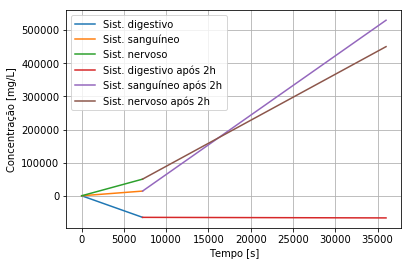

In [2]:
#cinética das diferentes anfetaminas
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
dt=0.1
tempo1=np.arange(0,7200,dt)
tempo2=np.arange(7200+dt,36000,dt)
doseCP = 10
doseLP = 10
dose_total = doseCP+doseLP
D=dose_total
S=0
N=0
Z0 = [D,S,N] #condição inicial
elimDCP = 0.005
elimDLP = 0.001
elimSCP = 0.004
elimSLP = 0.005
elimNCP = 0.003
elimNLP = 0.008
tad=0.7  #taxa de absorção da parede intestinal
tas=0.9  #taxa de absorção no sangue para o sistema nervoso
tun=0.99   #taxa de uso nervoso, quanto o sis. nervoso vai utilisar a cada intervalo de tempo

def estoques1(Z0, t): #antes de duas horas
	dDdt = - elimDCP * doseCP  - doseCP * tas
	dSdt = doseCP * tas - elimSCP*doseCP - doseCP * tad
	dNdt = doseCP * tad - elimNCP * doseCP
	return (dDdt, dSdt, dNdt)

a= odeint(estoques1, Z0, tempo1)
#print(a)
a0=a[len(tempo1)-1][0]
#print(a0)

Z=[a[len(tempo1)-1][0],a[len(tempo1)-1][1],a[len(tempo1)-1][2]]

def estoques2(Z,t):
	dDdt = - elimDCP * doseCP - elimDLP * doseLP - doseCP * tas + doseLP * tas
	dSdt = doseCP * tas + doseLP * tas - elimSCP*doseCP - elimSLP*doseLP - doseCP * tad + doseLP * tad
	dNdt = doseCP * tad + doseLP * tad - elimNCP * doseCP - elimNLP * doseLP
	return (dDdt, dSdt, dNdt)

b= odeint(estoques2,Z,tempo2)

plt.plot(tempo1, a[:,0],label="Sist. digestivo")
plt.plot(tempo1, a[:,1],label="Sist. sanguíneo")
plt.plot(tempo1, a[:,2],label="Sist. nervoso")
plt.plot(tempo2, b[:,0],label="Sist. digestivo após 2h")
plt.plot(tempo2, b[:,1],label="Sist. sanguíneo após 2h")
plt.plot(tempo2, b[:,2],label="Sist. nervoso após 2h")
plt.legend()
plt.grid(True)
plt.xlabel("Tempo [s]")
plt.ylabel("Concentração [mg/L]")
plt.show()

# dois odeints, com as equações de cada intervalo de tempo
